In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

!cp gdrive/MyDrive/DS404/mcbroken/* .
!ls

Mounted at /content/gdrive
gdrive			 mcbroken_1212_1230.json  mcbroken_1214_0730.json
main.py			 mcbroken_1212_1330.json  mcbroken_1214_0930.json
mcbroken_1209_1201.json  mcbroken_1212_1530.json  mcbroken_1214_1030.json
mcbroken_1209_1345.json  mcbroken_1212_1630.json  mcbroken_1214_1130.json
mcbroken_1209_1347.json  mcbroken_1212_1730.json  mcbroken_1214_1430.json
mcbroken_1209_1400.json  mcbroken_1212_1830.json  mcbroken_1214_1530.json
mcbroken_1209_1430.json  mcbroken_1212_1930.json  mcbroken_1214_1630.json
mcbroken_1209_1500.json  mcbroken_1212_2330.json  mcbroken_1214_1730.json
mcbroken_1209_1530.json  mcbroken_1213_0030.json  mcbroken_1214_1830.json
mcbroken_1209_1600.json  mcbroken_1213_0930.json  mcbroken_1214_1930.json
mcbroken_1209_1630.json  mcbroken_1213_1030.json  mcbroken_1214_2030.json
mcbroken_1209_1700.json  mcbroken_1213_1130.json  mcbroken_1214_2130.json
mcbroken_1209_1730.json  mcbroken_1213_1330.json  mcbroken_1214_2230.json
mcbroken_1209_1800.json  mcbroken_1213_1

In [ ]:
import os
import json
import datetime

content = os.listdir('gdrive/MyDrive/DS404/mcbroken/')
content.remove('main.py')
new_data = []
for mcbrok in content:
  f = open(mcbrok)
  data = json.load(f)
  for mc in data:
    mc_new = {}
    a = mc
    da = int(mcbrok[11:13])
    mont = int(mcbrok[9:11])
    for geo in mc['geometry']:
      mc_new[geo] = mc['geometry'][geo]
    for prop in mc['properties']:
      mc_new[prop] = mc['properties'][prop]

    time = mc['properties']['last_checked'][8]
    if time.isdigit():
      if mc['properties']['last_checked'][9].isdigit():
        time += mc['properties']['last_checked'][9]
      time = int(time)
    else:
      time = 1
    time = datetime.timedelta(minutes=time)
    ftime = datetime.datetime(2022, mont, da, int(mcbrok[14:16]), int(mcbrok[16:18]))
    ntime = ftime + time
    mc_new['datetime'] = datetime.datetime(ntime.year, ntime.month, ntime.day, ntime.hour)
    new_data.append(mc_new)
  # with open('new' + mcbrok, 'w') as f:
  #   json.dump(new_data, f, indent=4, sort_keys=True, default=str)

    # print(mcbrok)
mc_new

{'coordinates': ['11.40599889', '53.90370139', 0],
 'type': 'Point',
 'is_broken': False,
 'is_active': False,
 'dot': 'inactive',
 'state': None,
 'city': 'Wismar',
 'street': 'Zierower Landstr. 3',
 'country': 'DE',
 'last_checked': 'Checked 3 minutes ago',
 'datetime': datetime.datetime(2022, 12, 15, 15, 0)}

In [ ]:
del(new_data)

In [ ]:
for dat in new_data:
  print(dat.values())
  print(dat.keys())
  break

dict_values([['-73.989538', '40.750779', 0], 'Point', True, True, 'broken', 'NY', 'New York', '151 West 34th Street', 'USA', '1 minute ago', datetime.datetime(2022, 12, 9, 12, 0)])
dict_keys(['coordinates', 'type', 'is_broken', 'is_active', 'dot', 'state', 'city', 'street', 'country', 'last_checked', 'datetime'])


In [ ]:
import csv

header = ['is_broken', 'is_active', 'city', 'datetime']

with open('mc.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)
    for dat in new_data:
      # print(dat)
    # write the data
      dta = [dat['is_broken'], dat['is_active'], dat['city'], dat['datetime']]
      writer.writerow(dta)
print('sldkfnvds;ngdkf')

sldkfnvds;ngdkf


In [ ]:
import pandas as pd
mc_df = pd.read_csv("mc.csv")
mc_df

,is_broken,is_active,city,datetime
0,True,True,New York,2022-12-09 12:00:00
1,True,True,New York,2022-12-09 12:00:00
2,True,True,Manhattan,2022-12-09 12:00:00
3,False,True,Brooklyn,2022-12-09 12:00:00
4,False,True,New York,2022-12-09 12:00:00
...,...,...,...,...
415771,False,False,Berlin,2022-12-15 15:00:00
415772,False,False,Greifswald,2022-12-15 15:00:00
415773,False,False,Bremen,2022-12-15 15:00:00
415774,False,False,Schwerin,2022-12-15 15:00:00


In [ ]:
#finding that it's better to unite machines by the city and count num of broken machines
mc_data = []
with open('mc.csv', 'r', newline='') as csvfile:
  spamreader = csv.DictReader(csvfile)
  for row in spamreader:
    mc_data.append(row)
type(mc_data[0]['is_broken'] * 1)

str

In [ ]:
# cities = {}
# timeline = []
# i=0
# print(len(mc_data))
# # print(mc_data[0:20])
# # ipdb.set_trace()
# ndata = []
# #keys = 'city', 'num_of_machines' , 'num_of_broken', 'num_of_active', 'datetime'
# for mcs in mc_data:
#   if mcs['city'] + str(mcs['datetime']) in timeline:
#     # ndata.remove()
#     temp = timeline.index(mcs['city'] + str(mcs['datetime']))
#     print(temp)
#     cities['num_of_machines'] += 1
#     if mcs['is_broken']:
#       cities['num_of_broken'] += 1
#     if mcs['is_active']:
#       cities['num_of_active'] += 1
#     ndata[temp] = cities
#   else:
#     ndata.append(' ')
#     timeline.append(mcs['city'] + str(mcs['datetime']))
#     cities['city'] = mcs['city']
#     cities['datetime'] = mcs['datetime']
#     cities['num_of_machines'] = 1
#     if mcs['is_broken'] == True:
#       cities['num_of_broken'] = 1
#     else:
#       cities['num_of_broken'] = 0
#     if mcs['is_active']:
#       cities['num_of_active'] = 1
#     else:
#       cities['num_of_active'] = 0
#     oaoaoa = cities
#     ndata.append(oaoaoa)
#   # print(i)
#   i+=1
#   # ndata.append(cities)
#   print(ndata[0])
#   if i == 11:
#     break
# ndata

In [ ]:
a = mc_data[0]['datetime']
a

'2022-12-09 12:00:00'

In [ ]:
def dtti(dt):
  return int(a[:4])*1000000 + int(a[5:7])*10000 + int(a[8:10])*100 + int(a[11:13])


In [ ]:
cities = {}
timeline = []
i=0
print(len(mc_data))
# print(mc_data[0:20])
# ipdb.set_trace()
ndata = []
#keys = 'city', 'num_of_machines' , 'num_of_broken', 'num_of_active', 'datetime'
for mcs in mc_data:
  if mcs['city'] + str(mcs['datetime']) in timeline:
    tempdict = {}
    # ndata.remove()
    temp = timeline.index(mcs['city'] + str(mcs['datetime']))
    # print(temp)
    # dicti = ndata[temp]
    # print(dicti)
    # print(type(dicti))
    tempdict['num_of_machines'] = ndata[temp]['num_of_machines'] + 1
    # print(type(mcs['is_broken']))
    if mcs['is_broken'] == 'True':
      # print('A')
      tempdict['num_of_broken'] = ndata[temp]['num_of_broken'] + 1
    else:
      tempdict['num_of_broken'] = ndata[temp]['num_of_broken']
    if mcs['is_active'] == 'True':
      tempdict['num_of_active'] = ndata[temp]['num_of_active'] + 1
    else:
      tempdict['num_of_active'] = ndata[temp]['num_of_active']
    tempdict['city'] = mcs['city']
    tempdict['datetime'] = dtti(mcs['datetime'])
    ndata[temp] = tempdict.copy()
  else:
    #print(ndata, 'AAAAAAAAAAAAAAAAa')
    timeline.append(mcs['city'] + str(mcs['datetime']))
    cities['city'] = mcs['city']
    cities['datetime'] = dtti(mcs['datetime'])
    cities['num_of_machines'] = 1
    if mcs['is_broken'] == 'True':
      cities['num_of_broken'] = 1
    else:
      cities['num_of_broken'] = 0
    if mcs['is_active'] == 'True':
      cities['num_of_active'] = 1
    else:
      cities['num_of_active'] = 0
    # print(ndata)
    ndata.append(cities.copy())
    # cities = {}
    #print(ndata)
  # print(i)
  i+=1
  # ndata.append(cities)
  print(i)
  if i == 50000:
    break
ndata


Выходные данные были обрезаны до нескольких последних строк (5000).
45001
45002
45003
45004
45005
45006
45007
45008
45009
45010
45011
45012
45013
45014
45015
45016
45017
45018
45019
45020
45021
45022
45023
45024
45025
45026
45027
45028
45029
45030
45031
45032
45033
45034
45035
45036
45037
45038
45039
45040
45041
45042
45043
45044
45045
45046
45047
45048
45049
45050
45051
45052
45053
45054
45055
45056
45057
45058
45059
45060
45061
45062
45063
45064
45065
45066
45067
45068
45069
45070
45071
45072
45073
45074
45075
45076
45077
45078
45079
45080
45081
45082
45083
45084
45085
45086
45087
45088
45089
45090
45091
45092
45093
45094
45095
45096
45097
45098
45099
45100
45101
45102
45103
45104
45105
45106
45107
45108
45109
45110
45111
45112
45113
45114
45115
45116
45117
45118
45119
45120
45121
45122
45123
45124
45125
45126
45127
45128
45129
45130
45131
45132
45133
45134
45135
45136
45137
45138
45139
45140
45141
45142
45143
45144
45145
45146
45147
45148
45149
45150
45151
45152
45153
45154
45155
45

[{'num_of_machines': 29,
  'num_of_broken': 13,
  'num_of_active': 28,
  'city': 'New York',
  'datetime': 2022120912},
 {'num_of_machines': 4,
  'num_of_broken': 2,
  'num_of_active': 4,
  'city': 'Manhattan',
  'datetime': 2022120912},
 {'num_of_machines': 38,
  'num_of_broken': 9,
  'num_of_active': 37,
  'city': 'Brooklyn',
  'datetime': 2022120912},
 {'num_of_machines': 3,
  'num_of_broken': 0,
  'num_of_active': 3,
  'city': 'Jersey City',
  'datetime': 2022120912},
 {'num_of_machines': 4,
  'num_of_broken': 0,
  'num_of_active': 4,
  'city': 'Union City',
  'datetime': 2022120912},
 {'num_of_machines': 3,
  'num_of_broken': 0,
  'num_of_active': 3,
  'city': 'Long Island City',
  'datetime': 2022120912},
 {'num_of_machines': 2,
  'num_of_broken': 0,
  'num_of_active': 2,
  'city': 'Bayonne',
  'datetime': 2022120912},
 {'city': 'Maspeth',
  'datetime': 2022120912,
  'num_of_machines': 1,
  'num_of_broken': 1,
  'num_of_active': 1},
 {'num_of_machines': 2,
  'num_of_broken': 0,
 

In [ ]:
del(ndata)

In [ ]:
import pandas as pd
mc_df = pd.read_csv("mc.csv")
mc_df

,is_broken,is_active,city,datetime
0,True,True,New York,2022-12-09 12:00:00
1,True,True,New York,2022-12-09 12:00:00
2,True,True,Manhattan,2022-12-09 12:00:00
3,False,True,Brooklyn,2022-12-09 12:00:00
4,False,True,New York,2022-12-09 12:00:00
...,...,...,...,...
415771,False,False,Berlin,2022-12-15 15:00:00
415772,False,False,Greifswald,2022-12-15 15:00:00
415773,False,False,Bremen,2022-12-15 15:00:00
415774,False,False,Schwerin,2022-12-15 15:00:00


In [ ]:
ndata[len(ndata)-1]

{'city': 'Haren',
 'datetime': '2022-12-15 15:00:00',
 'num_of_machines': 1,
 'num_of_broken': 1,
 'num_of_active': 1}

In [ ]:
import csv

header = ['num_of_machines', 'num_of_broken', 'num_of_active', 'city', 'datetime']

with open('mc_short.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)
    for dat in ndata:
      # print(dat)
    # write the data
      dta = [dat['num_of_machines'], dat['num_of_broken'], dat['num_of_active'], dat['city'], dat['datetime']]
      writer.writerow(dta)
print('sldkfnvds;ngdkf')

sldkfnvds;ngdkf


In [ ]:
import pandas as pd
mc_df = pd.read_csv("mc_short.csv")
mc_df

,num_of_machines,num_of_broken,num_of_active,city,datetime
0,29,13,28,New York,2022120912
1,4,2,4,Manhattan,2022120912
2,38,9,37,Brooklyn,2022120912
3,3,0,3,Jersey City,2022120912
4,4,0,4,Union City,2022120912
...,...,...,...,...,...
16302,2,0,2,Boca Raton,2022120912
16303,1,0,1,Bethany,2022120912
16304,1,0,1,Higginsville,2022120912
16305,1,0,1,Becker,2022120912


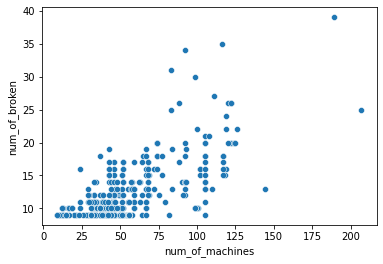

In [ ]:
import seaborn as sns
# sns.lmplot(x='num_of_machines', y='num_of_broken', data=mc_df.query('num_of_broken > 10'))
sns.scatterplot(x='num_of_machines', y='num_of_broken', data=mc_df.query('num_of_broken > 8'))

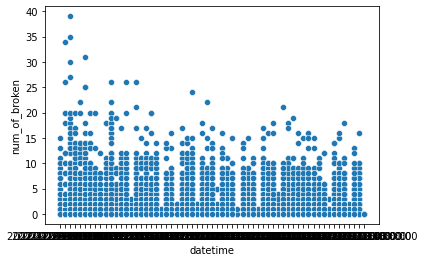

In [ ]:
sns.scatterplot(x='datetime', y='num_of_broken', data=mc_df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


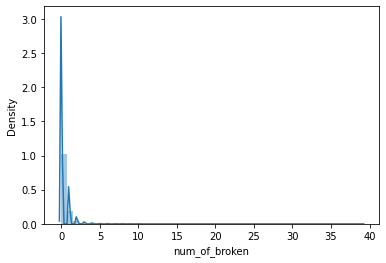

In [ ]:
sns.distplot(mc_df['num_of_broken'])

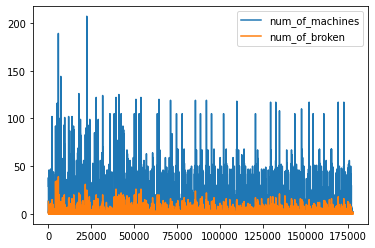

In [ ]:
mc_df[ ['num_of_machines','num_of_broken']].plot(kind = 'line')

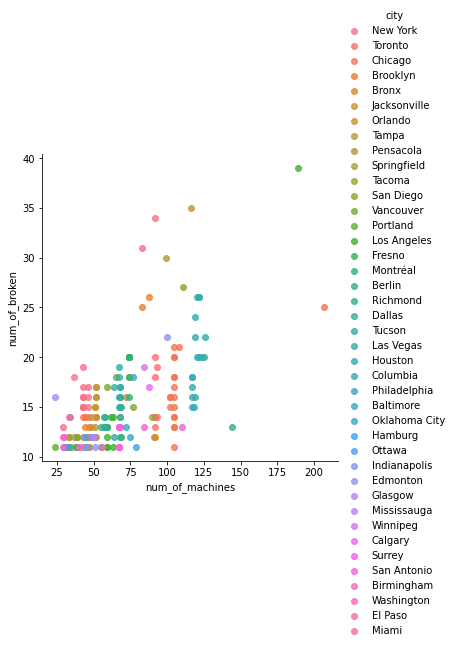

In [ ]:
sns.lmplot(x='num_of_machines', y='num_of_broken', data=mc_df.query('num_of_broken > 10'),
           fit_reg=False, hue = 'city')

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
feature_arr = ohe.fit_transform(mc_df[['city']]).toarray()
feature_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import numpy as np

In [ ]:
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()

In [ ]:
features = pd.DataFrame(feature_arr, columns=feature_labels)
new_df = pd.concat([mc_df, features], axis=1)


In [ ]:
new_df

,num_of_machines,num_of_broken,num_of_active,city,datetime,Elgin,Little Rock,Aachen,Aalen,Abbeville,...,Zionsville,Zittau,Zumbrota,Zweibrücken,Zwickau,Île-Perrot,Öhringen,Übach-Palenberg,Überlingen,NaN
0,29,13,28,New York,2022120912,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,2,4,Manhattan,2022120912,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38,9,37,Brooklyn,2022120912,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,3,Jersey City,2022120912,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,4,Union City,2022120912,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16302,2,0,2,Boca Raton,2022120912,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16303,1,0,1,Bethany,2022120912,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16304,1,0,1,Higginsville,2022120912,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16305,1,0,1,Becker,2022120912,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn import model_selection

In [ ]:
new_df.rename(columns = {'datetime':'dai'}, inplace = True)


In [ ]:
# X = new_df.drop(['num_of_broken', 'city'], axis = 1) #??????
y = new_df['num_of_broken']
X = new_df[['num_of_machines', 'num_of_active', 'dai']]
# new_dates = []
# counter = 0
# epoch_time = datetime.datetime(1970, 1, 1)
# dt = (X['dai'] - epoch_time)
# dt = datetime.datetime.strptime(X.dai, "%Y-%m-%d %H:%M:%S")
# X['datetime'] = (epoch_time - dt).total_seconds


In [ ]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2019)

In [ ]:
X_train.shape, type(X_train), X_test.shape, type(X_test), type(y_train)

((13045, 3),
 pandas.core.frame.DataFrame,
 (3262, 3),
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.preprocessing import RobustScaler
import csv
import datetime
from sklearn.svm import SVR
import sklearn.svm as svm
from sklearn.linear_model import LinearRegression

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

pipeline = make_pipeline(preprocessing.StandardScaler(),
                         RandomForestRegressor(n_estimators=100))

hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1], }

clf = LinearRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

clf = RandomForestRegressor()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

joblib.dump(clf, 'mcbreacker.pkl')

0.44099539511662544
0.9639007576651336


['mcbreacker.pkl']

In [ ]:
clf = joblib.load('mcbreacker.pkl')
print("Enter the details of the date you would like to predict")
print("\n")
option = input("Year: YYYY")
year = option
option = input("Month number (MM): ")
month = option
option = input("Day number (DD): ")
theday = option
option = input("Hour number (HH): ")
hour = option
option = input("num_all_machines: ")
allmach = option
option = input("active_machines: ")
actmach = option

# option = input("city ")
# city = option
day = int(year + '0' + month + theday + hour)
X = [[day, allmach, actmach]]
print("The num of working ice-cream machines is predicted to be: " + str(clf.predict(X)[0]))

Enter the details of the date you would like to predict


Year: YYYY2022
Month number (MM): 12
Day number (DD): 28
Hour number (HH): 12
num_all_machines: 50
active_machines: 48
The num of working ice-cream machines is predicted to be: 15.9175


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
